# **Tugas UTS**

---

## **Task**

Lakukan analisa terhadap data pada  


**https**://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra dengan menggunakan klasifikasi

- Metode KNN
- Metode Decision Tree

## Import Dataset and Library



In [31]:
# import library numpy dan pandas
import numpy as np
import pandas as pd

# import dataset
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv")

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [33]:
dataset

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


## Membagi dataset menjadi train data dan test data

Pertama tama kita bagi data input dan data klasifikasi

In [34]:
X = dataset.drop(columns=["Classification"]).values
y = dataset.Classification

Kemudian kita lakukan spliting dataset yang berguna untuk membagi data train dan data test yang nantinya akan digunakan untuk menghitung akurasi dari model klasifikasi

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((92, 9), (24, 9), (92,), (24,))

Selanjutnya kita lakukan Feature Scaling agar jarak data dapat diprediksi dengan baik

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

---

## **1. K-Nearest Neighbor (KNN)**

Kita buat klasifikasi KNN dengan nilai K=3 dan import library yang diperlukan



In [38]:
# import library
from sklearn.neighbors import KNeighborsClassifier

# membuat klasifikasi KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

Menghitung akurasi dari model KNN

In [39]:
print("Score data train  :", knn.score(X_train_scaled, y_train))
print("Score data test   :", knn.score(X_test_scaled, y_test))

Score data train  : 0.8586956521739131
Score data test   : 0.7083333333333334


Grafik menggunakan matplotlib

In [40]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=3 through 25 and record testing accuracy
k_range = range(3,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

In [41]:
#Testing accuracy for each value of K
scores

{3: 0.5833333333333334,
 4: 0.625,
 5: 0.5416666666666666,
 6: 0.5416666666666666,
 7: 0.4583333333333333,
 8: 0.5,
 9: 0.4166666666666667,
 10: 0.4166666666666667,
 11: 0.5,
 12: 0.5416666666666666,
 13: 0.5,
 14: 0.4166666666666667,
 15: 0.5,
 16: 0.4583333333333333,
 17: 0.5,
 18: 0.5416666666666666,
 19: 0.5,
 20: 0.5416666666666666,
 21: 0.5416666666666666,
 22: 0.5416666666666666,
 23: 0.4166666666666667,
 24: 0.5416666666666666,
 25: 0.5416666666666666}

Text(0, 0.5, 'Testing Accuracy')

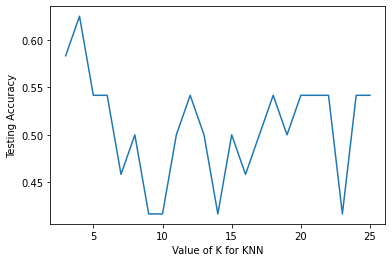

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Dari hasil yang tertera, dapat diketahui bahwa dengan menggunakan Metode KNN saat train data mendapatkan score sekitar 80%, tetapi saat test data scorenya menurun.

---

## **2. Decision Tree**

Kita buat klasifikasi Decision Tree dan import library yang diperlukan

In [43]:
# import library
from sklearn import tree
from matplotlib import pyplot as plt

# membuat klasifikasi Decision Tree
clf_tree = tree.DecisionTreeClassifier(criterion="entropy")
clf_tree = clf_tree.fit(X_train_scaled, y_train)

Lalu kita buat desain dari Decision Tree

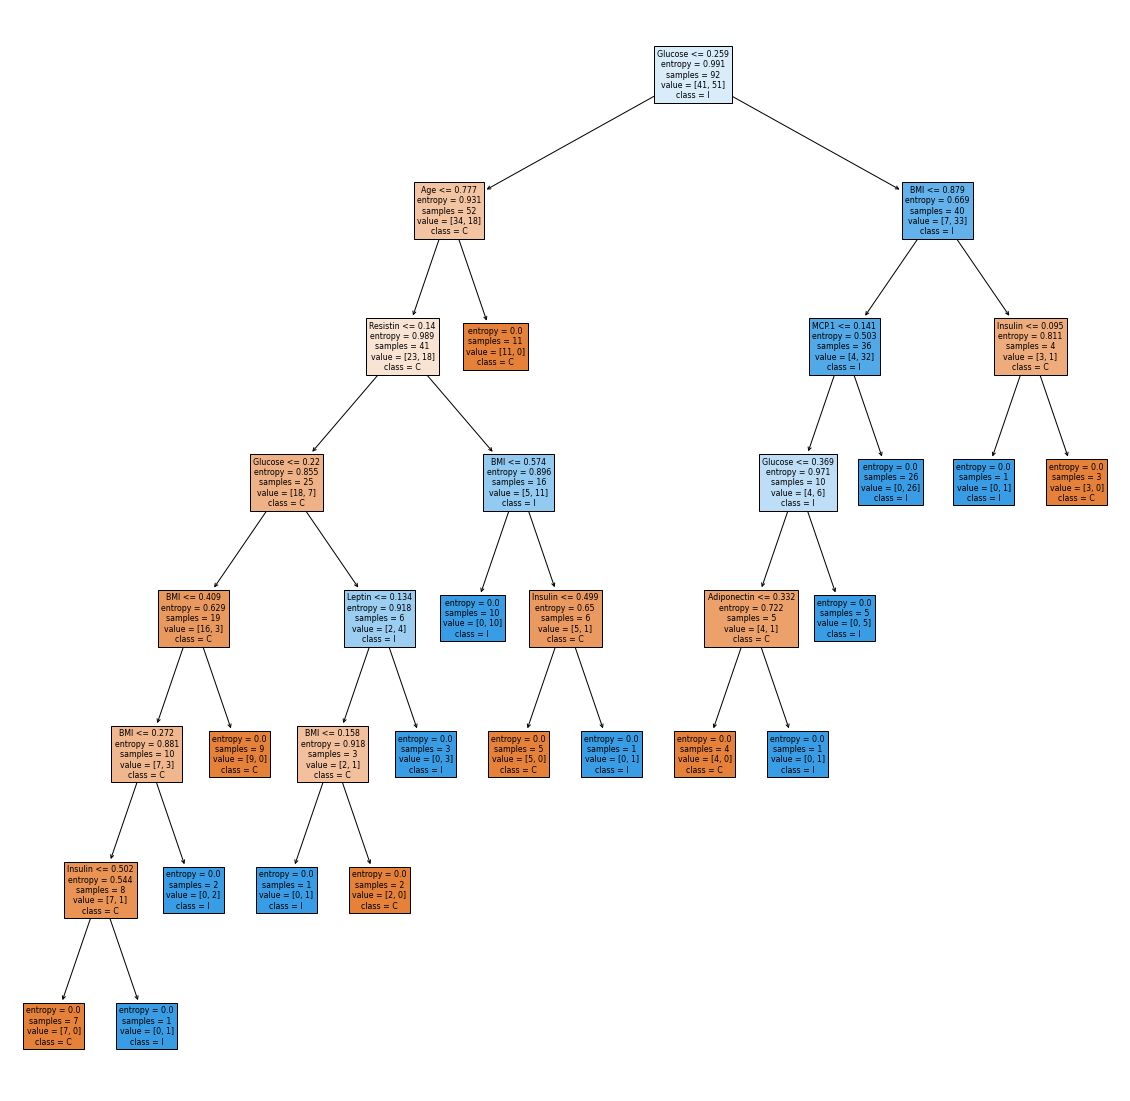

In [44]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf_tree, feature_names=list(dataset.columns.values)[:9], class_names=list(dataset.columns.values)[9] ,filled=True)

Menghitung akurasi dari model Decision Tree

In [45]:
print("Score data train :", clf_tree.score(X_train_scaled, y_train))
print("Score data test  :", clf_tree.score(X_test_scaled, y_test))

Score data train : 1.0
Score data test  : 0.75


Dari hasil yang tertera, dapat diketahui bahwa dengan menggunakan Metode Decision Tree saat train data mendapatkan score sempurna, tetapi saat test data scorenya menurun.